In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Conv2D,Add,MaxPooling2D, Dense, BatchNormalization,Input,Flatten, Dropout,GlobalMaxPooling2D,Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [3]:
os.listdir('../Downloads/archive/test/')

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN DIPPER',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'AMERICAN ROBIN',
 'AMERICAN WIGEON',
 'AMETHYST WOODSTAR',
 'ANDEAN GOOSE',
 'ANDEAN LAPWING',
 'ANDEAN SISKIN',
 'ANHINGA',
 'ANIANIAU',
 'ANNAS HUMMINGBIRD',
 'ANTBIRD',
 'ANTILLEAN EUPHONIA',
 'APAPANE',
 'APOSTLEBIRD',
 'ARARIPE MANAKIN',
 'ASHY STORM PETREL',
 'ASHY THRUSHBIRD',
 'ASIAN CRESTED IBIS',
 'ASIAN DOLLARD BIRD',
 'ASIAN GREEN BEE EATER',
 'ASIAN OPENBILL STORK',
 'AUCKLAND SHAQ',
 'AUSTRAL CANASTERO',
 'AUSTRALASIAN FIGBIRD',
 'AVADAVAT',
 'AZARAS SPINETAIL',
 'AZURE 

In [4]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directories for your data
train_dir = '../Downloads/archive/train/'
test_dir = '../Downloads/archive/test/'
valid_dir = '../Downloads/archive/valid/'

# List of some species
selected_species = ['GREEN BROADBILL','OSTRICH','OSPREY','GREAT GRAY OWL',
                         'GOLDEN PIPIT','GOULDIAN FINCH','ASIAN GREEN BEE EATER', 
                         'KAGU', 'CALIFORNIA CONDOR', 'KIWI', 'SANDHILL CRANE', 
                         'WHITE BREASTED WATERHEN', 'BLUE HERON', 'FLAME BOWERBIRD', 
                        'PUFFIN']

# Data Generators
train_datagen = ImageDataGenerator(rescale = 1.0/255)
test_datagen = ImageDataGenerator(rescale = 1.0/255)
valid_datagen = ImageDataGenerator(rescale = 1.0/255) 

# Data Loaders
train_generator = train_datagen.flow_from_directory(train_dir, classes=selected_species, target_size=(224,224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, classes=selected_species, target_size=(224,224), batch_size=32, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(valid_dir, classes=selected_species, target_size=(224,224), batch_size=32, class_mode='categorical')

# Loading InceptionV3 Model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalMaxPooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)  # Regularize with dropout
predictions = Dense(len(selected_species), activation='softmax')(x)

# Final Model to train
model = Model(inputs=base_model.input, outputs=predictions)

# Compile Model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit Model
history = model.fit(train_generator, 
                    validation_data=valid_generator, 
                    epochs=10,  # might change so comp doesnt blow up
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_steps=valid_generator.samples // valid_generator.batch_size)

# Evaluate Model
val_loss, val_acc = model.evaluate(test_generator)
print('Test accuracy:', val_acc)

Found 2376 images belonging to 15 classes.
Found 75 images belonging to 15 classes.
Found 75 images belonging to 15 classes.


Epoch 1/10
74/74 [==============================] - 40s 495ms/step - loss: 1.5941 - accuracy: 0.7982 - val_loss: 0.0486 - val_accuracy: 0.9844
Epoch 2/10
74/74 [==============================] - 29s 396ms/step - loss: 0.1488 - accuracy: 0.9548 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 3/10
74/74 [==============================] - 30s 408ms/step - loss: 0.1492 - accuracy: 0.9492 - val_loss: 0.0950 - val_accuracy: 0.9688
Epoch 4/10
74/74 [==============================] - 31s 418ms/step - loss: 0.1345 - accuracy: 0.9599 - val_loss: 0.0254 - val_accuracy: 0.9844
Epoch 5/10
74/74 [==============================] - 32s 430ms/step - loss: 0.0771 - accuracy: 0.9742 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 31s 424ms/step - loss: 0.0534 - accuracy: 0.9846 - val_loss: 0.1439 - val_accuracy: 0.9688
Epoch 7/10
74/74 [==============================] - 31s 419ms/step - loss: 0.0447 - accuracy: 0.9842 - val_loss: 0.0044 - val_accuracy: 1.0000

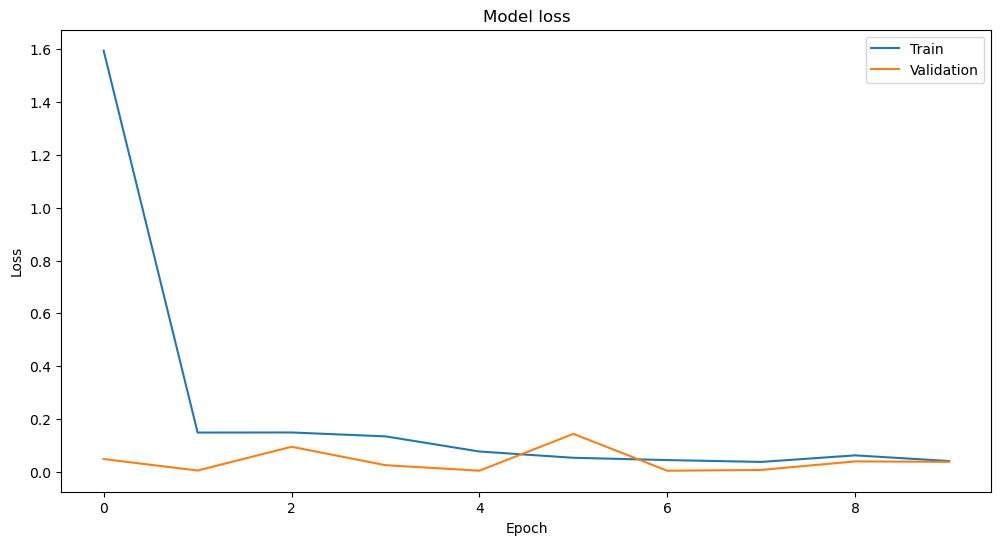

In [7]:
# plot our training and validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [5]:
len(base_model.layers)

311